# Importing libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Plotting

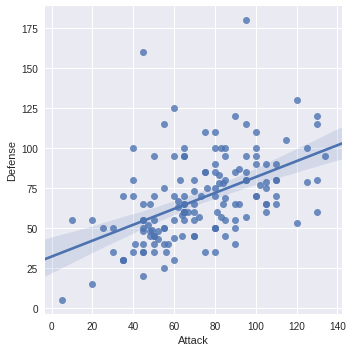

In [3]:
sns.lmplot(x='Attack', y='Defense', data=df)

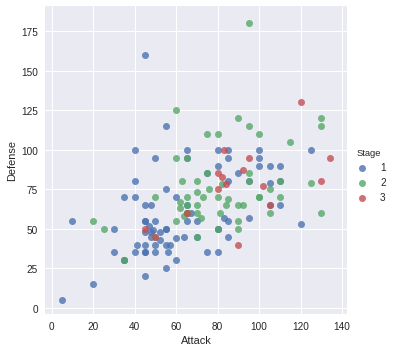

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, hue='Stage')

(0, 142.23103796542472)

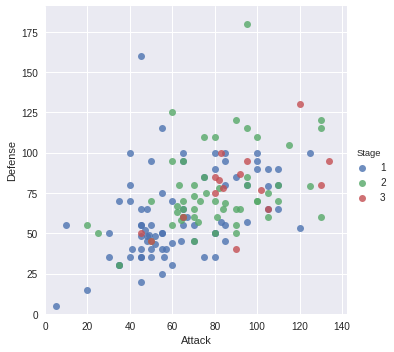

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, hue='Stage')

plt.ylim(0, None)
plt.xlim(0, None)

# boxplot

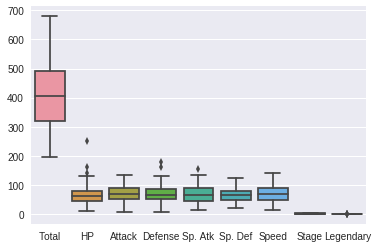

In [7]:
sns.boxplot(data=df)

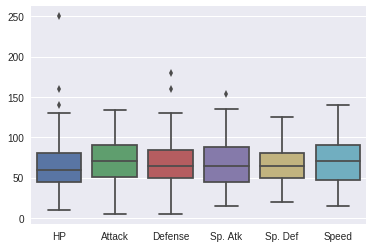

In [8]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# New boxplot using stats_df
sns.boxplot(data=stats_df)

# seaborn themes

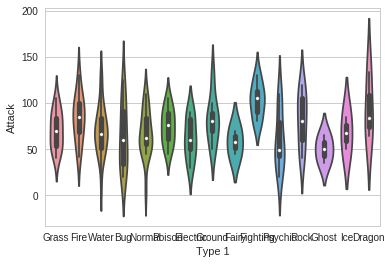

In [9]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

# color palettes

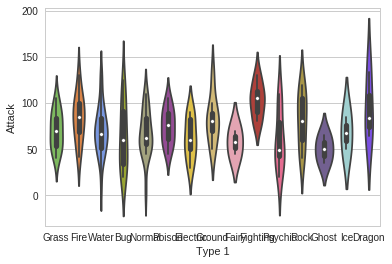

In [10]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df,
               palette=pkmn_type_colors)

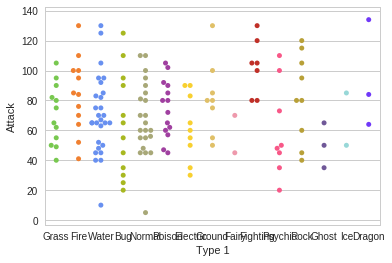

In [11]:
# Swarm plot
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)

# overlaying plots

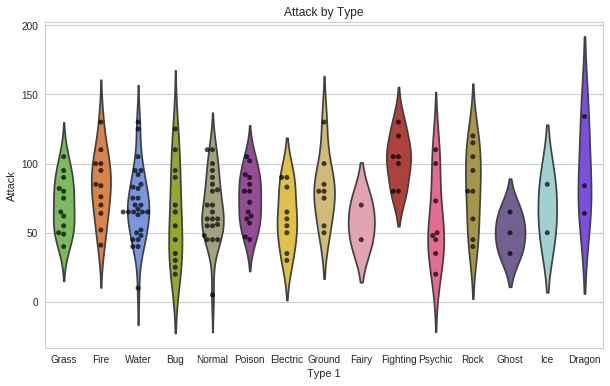

In [12]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# putting all together

In [14]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"],
                    var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


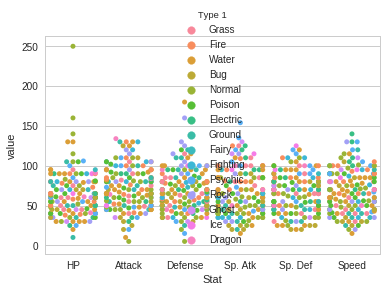

In [15]:
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

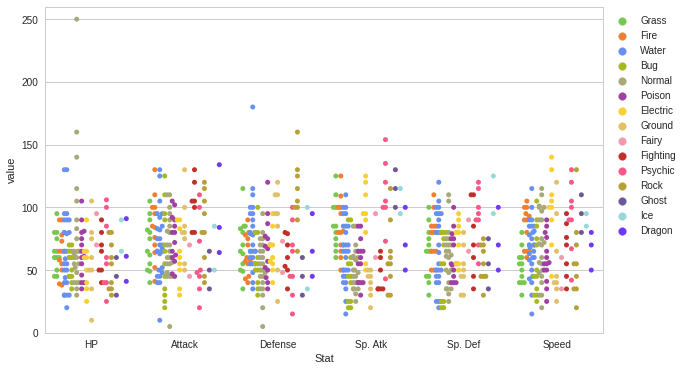

In [16]:
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, 
              palette=pkmn_type_colors)
 
plt.ylim(0, 260)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# mini-gallery

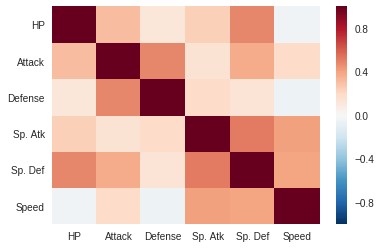

In [17]:
# heatmap
corr = stats_df.corr()
sns.heatmap(corr)

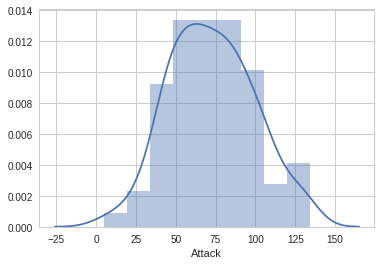

In [19]:
# histogram
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

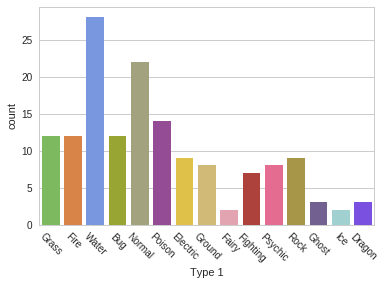

In [20]:
# bar plot
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

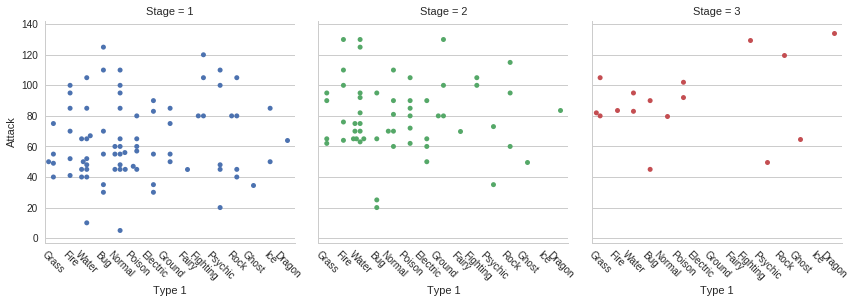

In [22]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

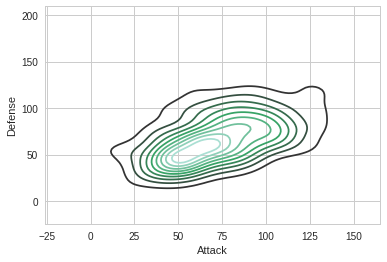

In [23]:
# density plot
sns.kdeplot(df.Attack, df.Defense)

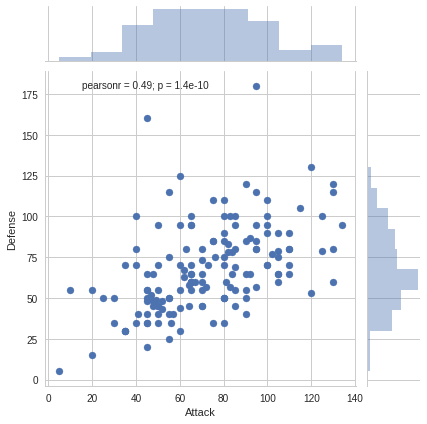

In [24]:
# joint distribution plot
sns.jointplot(x='Attack', y='Defense', data=df)